In [2]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import niezbędnych procedur pakietu scipy i scikit.learn
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score 

color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [3]:
flags = pd.read_csv('flag.csv')

flags.head(10)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [40]:
for col in flags.columns:
    print(col,':',np.unique(flags[col]))
    print()

name : ['Afghanistan' 'Albania' 'Algeria' 'American-Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua-Barbuda' 'Argentina' 'Argentine' 'Australia'
 'Austria' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Botswana' 'Brazil'
 'British-Virgin-Isles' 'Brunei' 'Bulgaria' 'Burkina' 'Burma' 'Burundi'
 'Cameroon' 'Canada' 'Cape-Verde-Islands' 'Cayman-Islands'
 'Central-African-Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comorro-Islands' 'Congo' 'Cook-Islands' 'Costa-Rica' 'Cuba' 'Cyprus'
 'Czechoslovakia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican-Republic'
 'Ecuador' 'Egypt' 'El-Salvador' 'Equatorial-Guinea' 'Ethiopia' 'Faeroes'
 'Falklands-Malvinas' 'Fiji' 'Finland' 'France' 'French-Guiana'
 'French-Polynesia' 'Gabon' 'Gambia' 'Germany-DDR' 'Germany-FRG' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hong-Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' '

In [44]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H

df = flags.drop(columns = ['landmass','name','mainhue','topleft','botright'])
hopkins(df)


0.9788498639833755

In [3]:
flags.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,...,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000
mean,3.572,2.211,700.046,23.268,5.340,2.191,0.454,1.552,3.464,0.789,...,0.170,0.149,0.093,0.149,1.387,0.057,0.139,0.253,0.201,0.082
std,1.553,1.308,2170.928,91.934,3.497,2.061,1.038,2.328,1.300,0.409,...,0.463,0.385,0.291,0.436,4.396,0.232,0.347,0.436,0.402,0.276
min,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,1.000,9.000,0.000,2.000,1.000,0.000,0.000,3.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,4.000,2.000,111.000,4.000,6.000,1.000,0.000,0.000,3.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,5.000,4.000,471.250,14.000,9.000,4.000,0.000,3.000,4.000,1.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.750,0.000,0.000
max,6.000,4.000,22402.000,1008.000,10.000,7.000,5.000,14.000,8.000,1.000,...,4.000,2.000,1.000,4.000,50.000,1.000,1.000,1.000,1.000,1.000


Text(0.5, 1.0, 'How many countries have a text on the flag?')

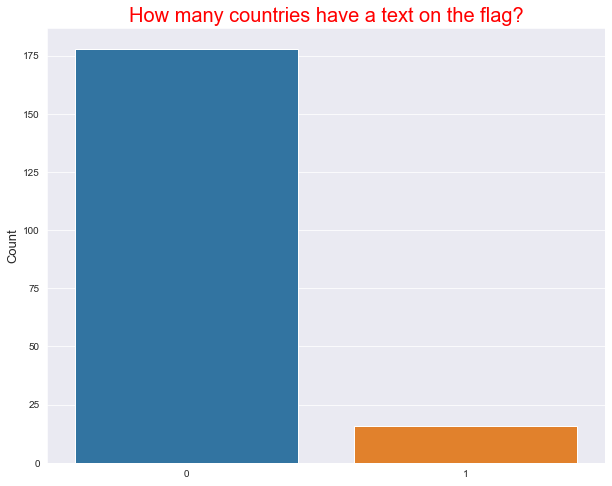

In [26]:
xticks = list(range(2))
text = ['0','1']
plt.figure(figsize = (10, 8))
ax = sns.countplot(flags['text'])
plt.xlabel('', size = 13)
plt.ylabel('Count', size = 13)
plt.xticks(size = 10)
plt.yticks(size = 10)
ax.set_xticks(xticks)
ax.set_xticklabels(text, minor=False)
plt.title('How many countries have a text on the flag?', size = 20, color = 'red')

Text(0.5, 1.0, 'How many countries have these colors on the flag?')

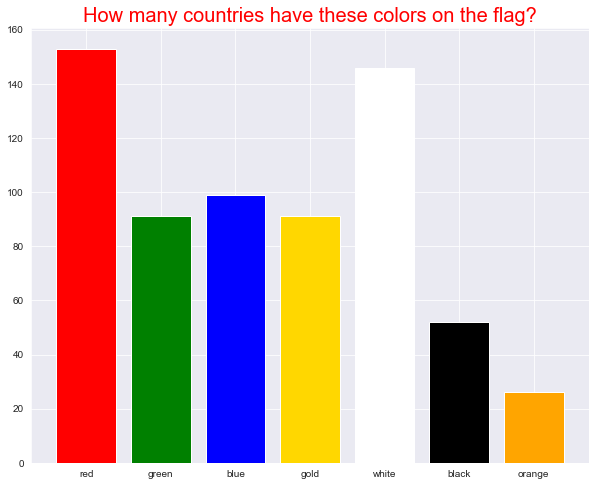

In [22]:
colors = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange']
col_count = []

for col in colors:
    col_count.append(sum(flags[col] == 1))

plt.figure(figsize = (10, 8))
plt.bar(colors, col_count, color = colors)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('How many countries have these colors on the flag?', size = 20, color = 'red')

Text(0.5, 1.0, 'How many countries have this amount of colors on the flag?')

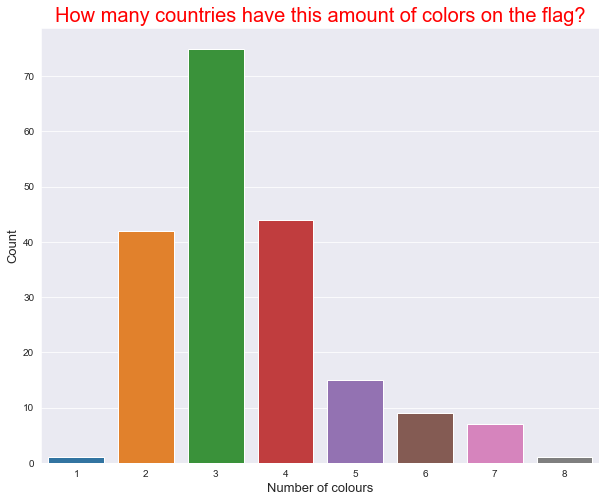

In [11]:
xticks = list(range(8))
colors = ['1', '2', '3', '4', '5','6', '7', '8']
plt.figure(figsize = (10, 8))
ax = sns.countplot(flags['colours'])
plt.xlabel('Number of colours', size = 13)
plt.ylabel('Count', size = 13)
plt.xticks(size = 10)
plt.yticks(size = 10)
ax.set_xticks(xticks)
ax.set_xticklabels(colors, minor=False)
plt.title('How many countries have this amount of colors on the flag?', size = 20, color = 'red')

[[  0.          26.           0.           2.        ]
 [  1.           2.           0.           2.        ]
 [  4.         195.           0.           3.        ]
 [  3.          34.           0.           2.        ]
 [ 10.         196.           0.           4.        ]
 [  5.          27.           0.           2.        ]
 [  6.          67.           0.           2.        ]
 [  8.          11.           0.           2.        ]
 [  9.          12.           0.           2.        ]
 [ 15.         198.           0.           5.        ]
 [ 52.         201.           0.           3.        ]
 [ 21.         202.           0.           3.        ]
 [ 13.          14.           0.           2.        ]
 [ 18.         206.           0.           3.        ]
 [ 16.         203.           0.           6.        ]
 [ 28.         208.           0.           7.        ]
 [ 57.          71.           0.           2.        ]
 [116.         210.           0.           3.        ]
 [142.    

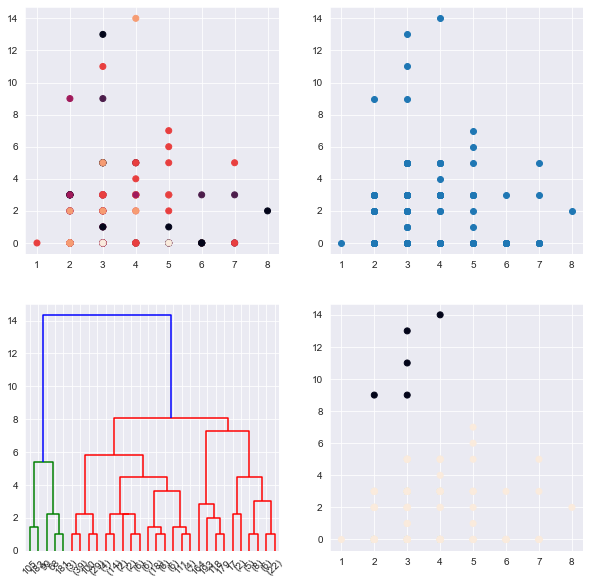

In [17]:
df2 = flags[['colours','stripes']]
grupy = linkage(df2, method = 'complete', metric = 'euclidean')
prog_proc = 60
prog = prog_proc*max(grupy[:,2])/100
print(grupy)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(x = df2['colours'], y = df2['stripes'], c = flags['landmass'].astype('category').cat.codes)
plt.subplot(2,2,2)
plt.scatter(x = flags['colours'], y = flags['stripes'])
plt.subplot(2,2,3)
cl = dendrogram(grupy, truncate_mode = 'lastp', color_threshold = prog )
df2['grupa'] =  fcluster(grupy, prog, criterion = 'distance')
plt.subplot(2,2,4)
plt.scatter(x = df2['colours'], y = df2['stripes'], c = df2['grupa'])

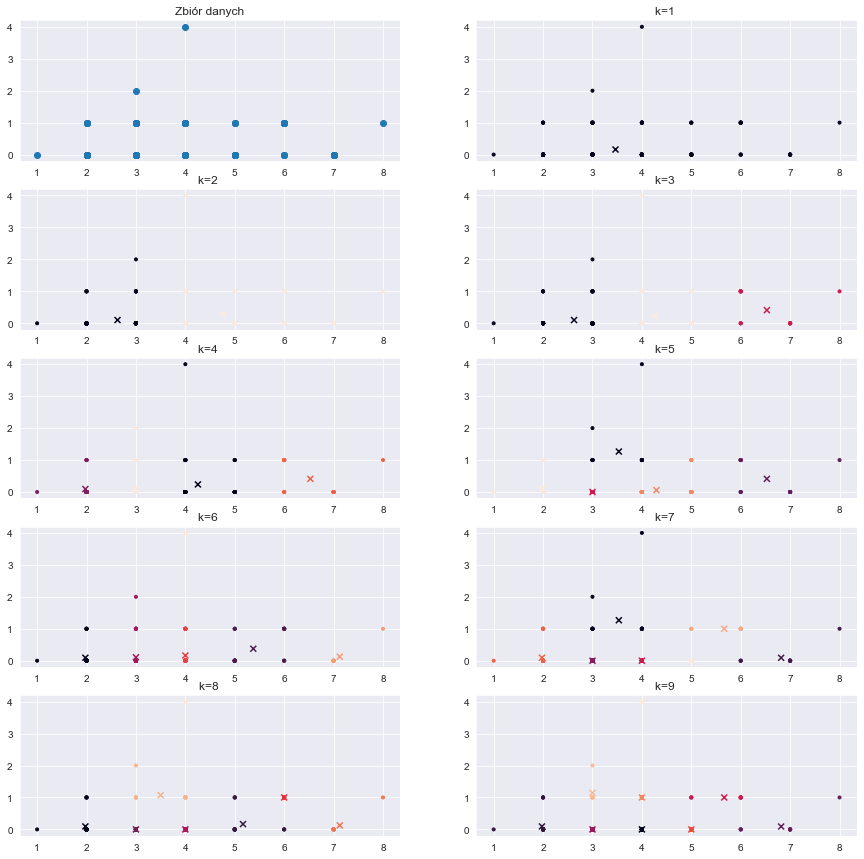

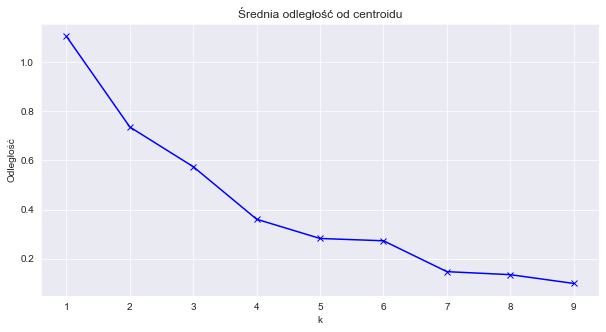

In [15]:

df = flags[['colours','circles']]
maks_k = 9
zakres_k = range(1,maks_k)
ile_w_pionie = int(maks_k/2) + 1
plt.figure(figsize=(15,15))
plt.subplot(ile_w_pionie,2,1)
plt.scatter(df['colours'], df['circles'])
plt.title('Zbiór danych')
srednia_odl = []
pozycja = 2
for k in range(1,maks_k+1):
    plt.subplot(ile_w_pionie,2,pozycja)
    pozycja = pozycja + 1
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    etykiety_klastrow = kmeans.fit_predict(df)
    plt.scatter( df.colours,df.circles, marker='.', c=etykiety_klastrow)
    centroidy = kmeans.cluster_centers_
    plt.scatter(centroidy[:,0], centroidy[:,1], marker='x', c=np.array(range(k)))
    plt.title('k=%s ' % k)
    srednia_odl.append(sum(np.min(cdist(df, centroidy, 'euclidean'), axis=1)) / df.shape[0]) 

plt.figure(figsize=(10,5))
plt.plot(range(1,maks_k+1), srednia_odl, 'bx-')
plt.xlabel('k')
plt.ylabel('Odległość')
plt.title('Średnia odległość od centroidu')
plt.show()

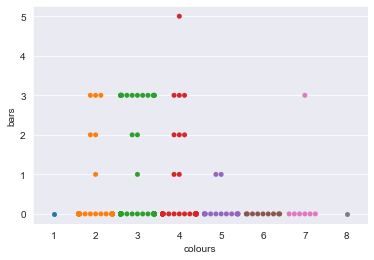

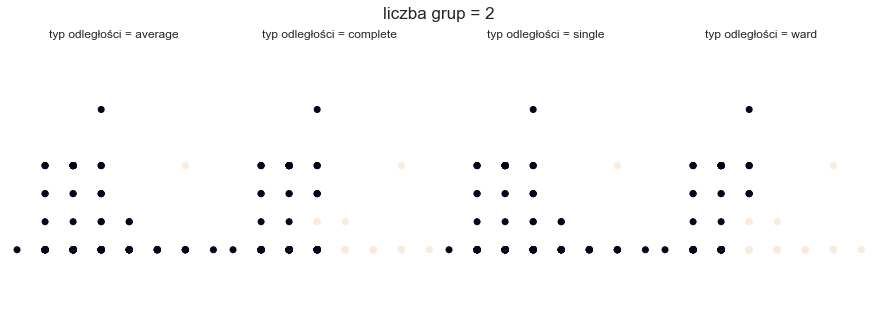

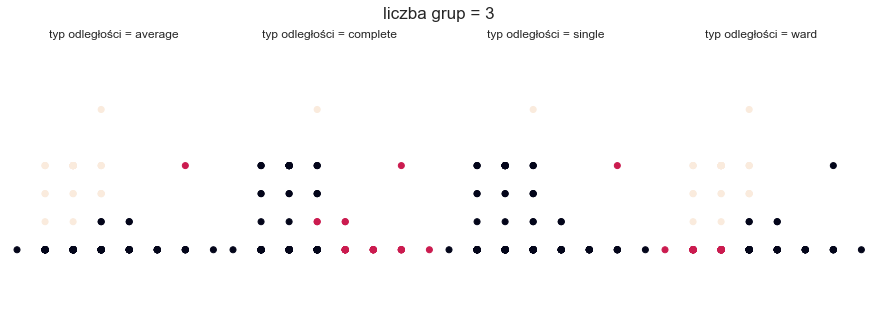

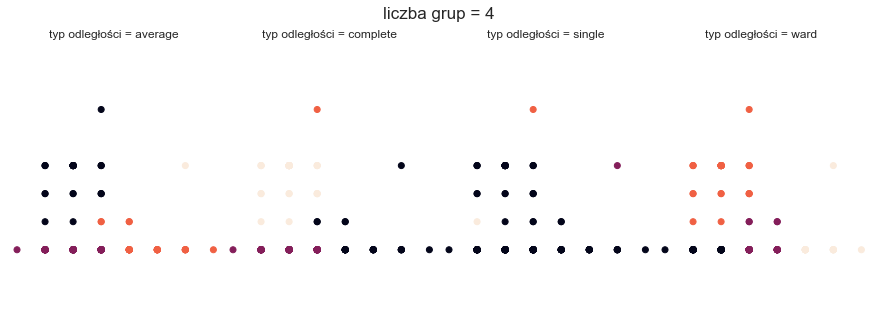

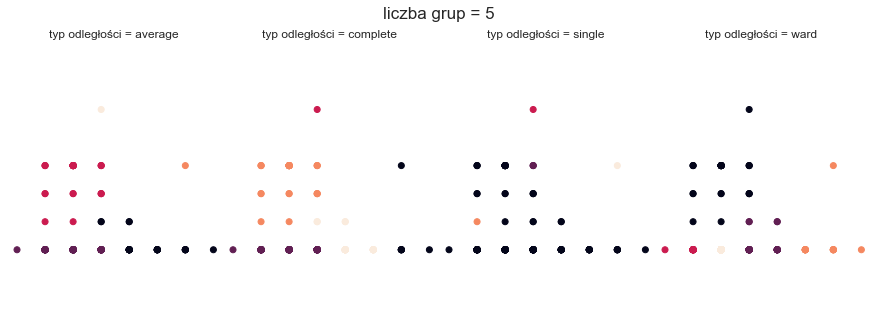

In [14]:

df = flags[['colours','bars']]
sns.swarmplot(data=df, x='colours',y='bars')
for ile_grup in (2,3,4,5):
    plt.figure(figsize=(12, 4.5))
    for index, typ_odleglosci in enumerate(('average', 'complete', 'single', 'ward')):
        plt.subplot(1, 4, index + 1)
        model = AgglomerativeClustering(linkage = typ_odleglosci, n_clusters = ile_grup)
        model.fit(df)
        plt.scatter(df.colours, df.bars, c = model.labels_)
        plt.title('typ odległości = %s ' % typ_odleglosci, fontdict=dict(verticalalignment = 'top'))
        plt.axis('equal')
        plt.axis('off')
        plt.subplots_adjust(bottom = 0, top = .89, wspace = 0, left = 0, right = 1)
        plt.suptitle('liczba grup = %i' % ile_grup, size = 17)

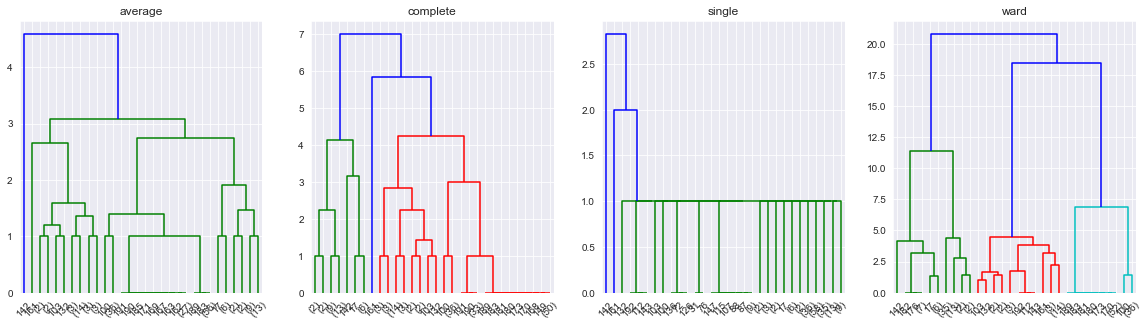

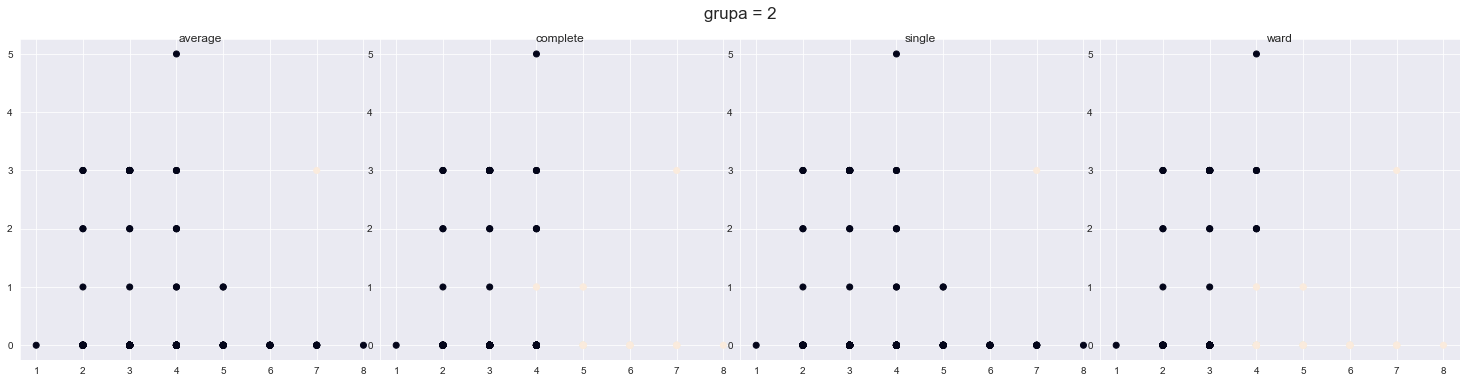

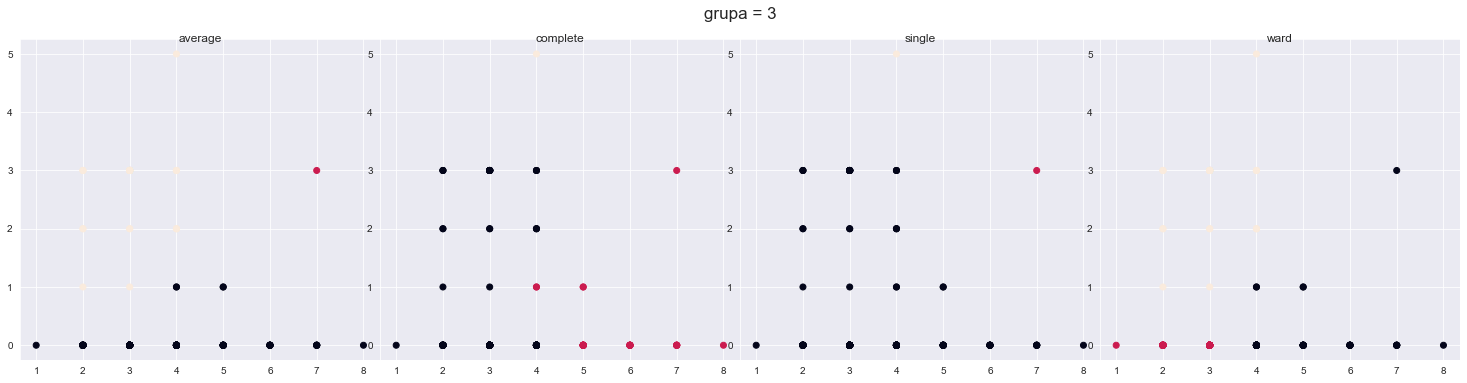

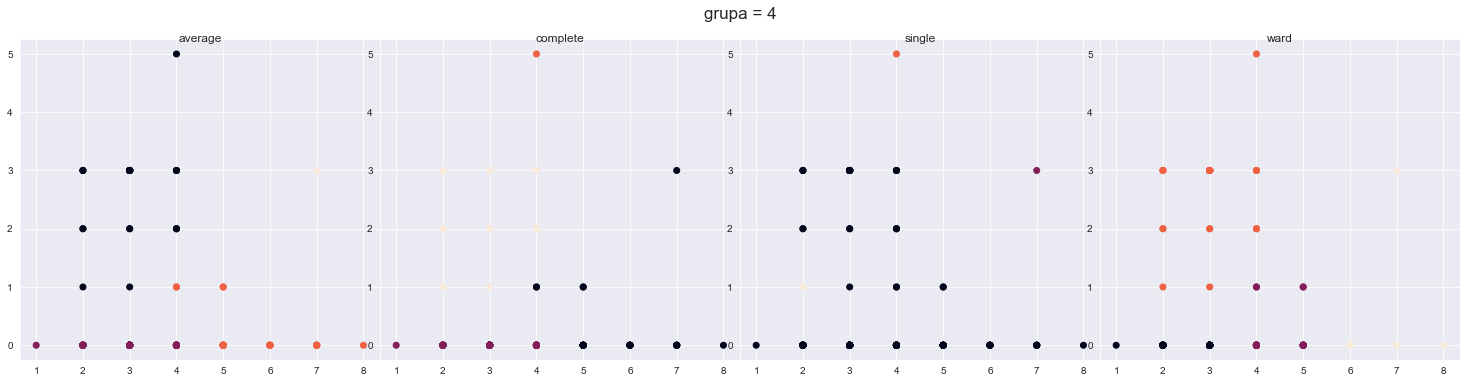

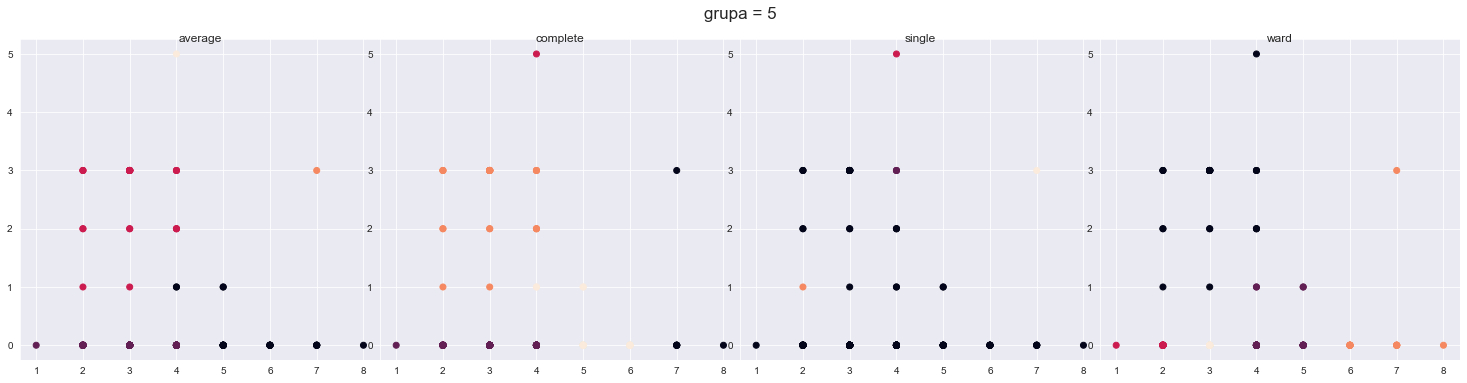

In [16]:

df = flags[['colours','bars']]
methods = ('average', 'complete','single', 'ward')
plt.figure(figsize=(20, 5))
for i in range(0, 4):
    groups = linkage(df, method = methods[i], metric = 'euclidean')
    plt.subplot(1,4,i+1)
    plt.title(methods[i])
    d = dendrogram(groups, truncate_mode = 'lastp')
    
for n in (2,3,4,5):
    plt.figure(figsize=(20, 5))
    for index, method in enumerate(methods):
        plt.subplot(1, 4, index + 1)
        model = AgglomerativeClustering(linkage = method, n_clusters = n)
        model.fit(df)
        plt.scatter(df.colours, df.bars, c = model.labels_)
        plt.title(f"{method}", fontdict=dict(verticalalignment = 'top'))
        plt.subplots_adjust(bottom = 0, top = .89, wspace = 0, left = 0, right = 1)
        plt.suptitle(f"grupa = {n}", size = 17)